# R2S 2025 Data Processing

> Author: Elias Aoubala

> Date: 10/07/2025

In [1]:
import glob
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from pathlib import Path
from turborocket.combustion.comb_solver import CombustionCantera
from turborocket.sizing.pump import Barske, DiffuserType
from turborocket.fluids.fluids import IncompressibleFluid
from scipy import interpolate
from scipy.signal import spectrogram
from scipy.io import wavfile

## 1 - Background

This document contains the data analysis conducted for the R2S 2025 firing of the Mermaid Man and Barnacle Boy turbopump.

In this document, the analysis has been split up based on the type of analysis conducted.

## 2 - DAQ Data Extraction

In this section, we perform the data extraction of the R2S data.

### 2.1 - Loading up the Data

In [2]:
DIRECTORY = "test_data/R2S_2025/"

# Array Setup
TIME = []
PTX101 = []             # Engine IPA Inlet
PTX102 = []             # Engine IPA Exit
PTX103 = []             # Engine Chamber Pressure
PTX104 = []             # Pump Delivery Pressure
PTX105 = []             # Gas Generator Chamber Pressure

PTX732 = []
PTX733 = []

PTX852 = []
PTX853 = []

TCX101 = []             # Engine Oxidiser Manifold
TCX102 = []             # Engine IPA Exit Fule Manifold
TCX103 = []             # Engine IPA Inlet Fuel Manifold 
TCX104 = []             # Gas Generator Chamber Temperature

M730 = []               # A Mass Flow Rate 
M850 = []               # A Mass Flow Rate

EXPERIMENT_NAME = []

# Channel Names
TIME_NAME = "Time (s)"
PTX101_NAME = "Engine IPA Inlet"
PTX102_NAME = "Engine IPA Exit"
PTX103_NAME = "Engine Chamber Pressure"
PTX104_NAME = "Pump Delivery Pressure"
PTX105_NAME = "Gas Generator Chamber Pressure"

PTX732_NAME = "IPA Delivery Pressure"
PTX733_NAME = "IPA Throttle Pressure"

PTX852_NAME = "Nitrous Delivery Pressure"
PTX853_NAME = "Nitrous Throttle Pressure"

TCX101_NAME = "Engine Oxidiser Manifold"
TCX102_NAME = "Engine IPA Exit Fule Manifold"
TCX103_NAME = "Engine IPA Inlet Fuel Manifold"
TCX104_NAME = "Gas Generator Chamber Temperature"

M730_NAME = "Mass Flow Rate"
M850_NAME = "Mass Flow Rate"

In [3]:
for filename in glob.glob(os.path.join(DIRECTORY, "*.h5")):

    EXPERIMENT_NAME.append(Path(filename).stem)
    h5 = h5py.File(filename, "r")

    PTX101.append(h5["groups"]["experiment"]["PTX101"]["data"])
    name = h5["groups"]["experiment"]["PTX101"].attrs['name']
    units = h5["groups"]["experiment"]["PTX101"].attrs['units']
    PTX101_NAME = f"{name}"

    PTX102.append(h5["groups"]["experiment"]["PTX102"]["data"])
    name = h5["groups"]["experiment"]["PTX102"].attrs["name"]
    units = h5["groups"]["experiment"]["PTX102"].attrs["units"]
    PTX102_NAME = f"{name}"

    PTX103.append(h5["groups"]["experiment"]["PTX103"]["data"])
    name = h5["groups"]["experiment"]["PTX103"].attrs["name"]
    units = h5["groups"]["experiment"]["PTX103"].attrs["units"]
    PTX103_NAME = f"{name}"

    PTX104.append(h5["groups"]["experiment"]["PTX104"]["data"])
    name = h5["groups"]["experiment"]["PTX104"].attrs["name"]
    units = h5["groups"]["experiment"]["PTX104"].attrs["units"]
    PTX104_NAME = f"{name}"

    PTX105.append(h5["groups"]["experiment"]["PTX105"]["data"]) 
    name = h5["groups"]["experiment"]["PTX105"].attrs["name"]
    units = h5["groups"]["experiment"]["PTX105"].attrs["units"]
    PTX105_NAME = f"{name}"

    # Temperature

    TCX101.append(h5["groups"]["experiment"]["TCX101"]["data"])
    name = h5["groups"]["experiment"]["TCX101"].attrs["name"]
    units = h5["groups"]["experiment"]["TCX101"].attrs["units"]
    TCX101_NAME = f"{name}"

    TCX102.append(h5["groups"]["experiment"]["TCX102"]["data"])
    name = h5["groups"]["experiment"]["TCX102"].attrs["name"]
    units = h5["groups"]["experiment"]["TCX102"].attrs["units"]
    TCX102_NAME = f"{name}"

    TCX103.append(h5["groups"]["experiment"]["TCX103"]["data"])
    name = h5["groups"]["experiment"]["TCX103"].attrs["name"]
    TCX103_NAME = f"{name}"

    TCX104.append(h5["channels"]["TCX104"]["data"])
    name = h5["channels"]["TCX104"].attrs["name"]
    TCX104_NAME = f"{name}"

    M730.append(h5["groups"]["mdot"]["M730"]["data"])
    name = h5["groups"]["mdot"]["M730"].attrs["name"]
    M730_NAME = f"{name}"

    M850.append(h5["groups"]["mdot"]["M850"]["data"])
    name = h5["groups"]["mdot"]["M850"].attrs["name"]
    M850_NAME = f"{name}"

    PTX732.append(h5["groups"]["pt"]["PT732"]["data"])
    name = h5["groups"]["pt"]["PT732"].attrs["name"]
    PTX732_NAME = f"{name}"

    PTX733.append(h5["groups"]["pt"]["PT733"]["data"])
    name = h5["groups"]["pt"]["PT733"].attrs["name"]
    PTX733_NAME = f"{name}"

    PTX852.append(h5["groups"]["pt"]["PT852"]["data"])
    name = h5["groups"]["pt"]["PT852"].attrs["name"]
    PTX852_NAME = f"{name}"

    PTX853.append(h5["groups"]["pt"]["PT853"]["data"])
    name = h5["groups"]["pt"]["PT853"].attrs["name"]
    PTX853_NAME = f"{name}"

    TIME.append(h5["groups"]["experiment"]["PTX101"]["time"])

### 2.2 - Plotting Data

#### 2.2.1 - Pressure Plots

Here we take plots for the pressure of the system. To improve signal quality, we have used a savgol filter to filter out the noise in sensor aquisition

##### 2.2.1.1 - Experiment #1

This experiment was a simple 1 second spin of the GG to demonstrate functional performance of the system

In [4]:
ex_i = 0  # Experiment Number

###### 2.2.1.1.1 - Engine Conditions

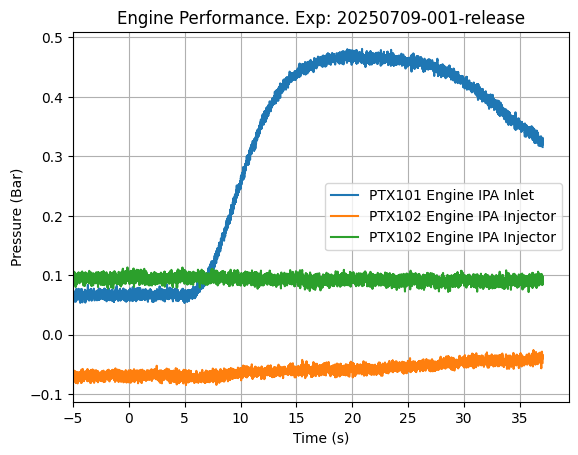

In [5]:
window = 301
polyorder = 3

PTX_101_FILT = savgol_filter(np.array(PTX101[ex_i]), window_length=window, polyorder=polyorder)
PTX_102_FILT = savgol_filter(np.array(PTX102[ex_i]), window_length=window, polyorder=polyorder)
PTX_103_FILT = savgol_filter(np.array(PTX103[ex_i]), window_length=window, polyorder=polyorder)

plt.plot(np.array(TIME[ex_i]), PTX_101_FILT, label = PTX101_NAME)
plt.plot(np.array(TIME[ex_i]), PTX_102_FILT, label=PTX102_NAME)
plt.plot(np.array(TIME[ex_i]), PTX_103_FILT, label=PTX102_NAME)

plt.legend()
plt.title(f"Engine Performance. Exp: {EXPERIMENT_NAME[ex_i]}")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (Bar)")

plt.xlim(left=-5)

plt.grid(True)

###### 2.2.1.1.2 - Pump Conditions

Text(0.5, 0.98, 'Pump Performance. Exp: 20250709-001-release')

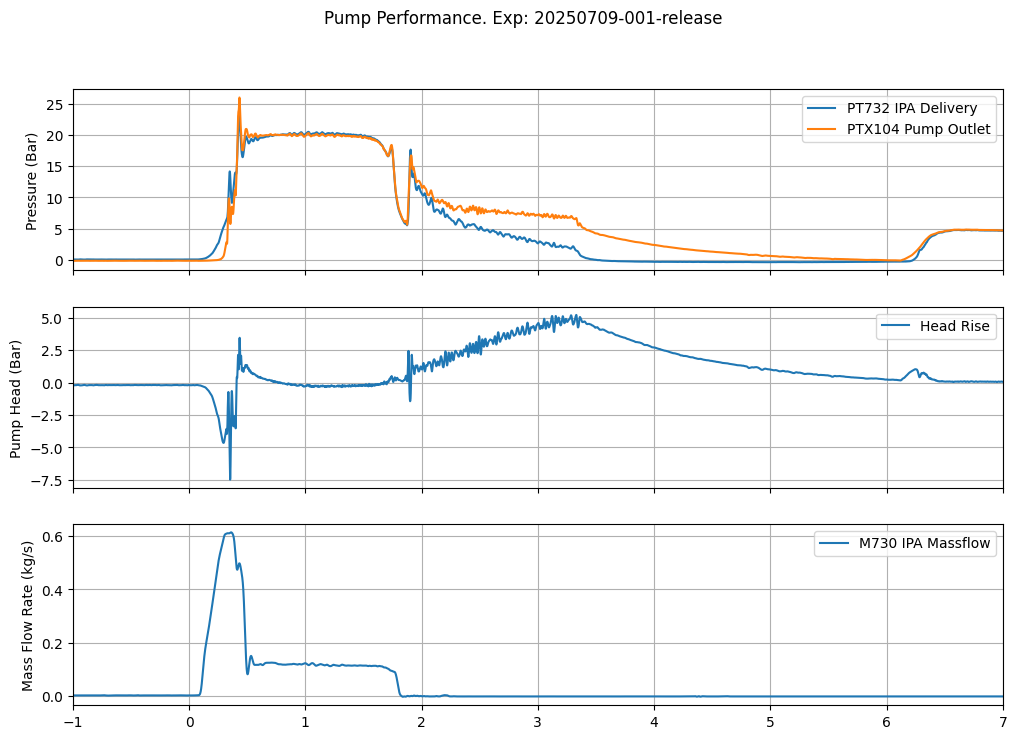

In [6]:
window = 301
polyorder = 3

PTX_732_FILT = savgol_filter(np.array(PTX732[ex_i]), window_length=window, polyorder=polyorder)
PTX_733_FILT = savgol_filter(np.array(PTX733[ex_i]), window_length=window, polyorder=polyorder)
M730_FILT = savgol_filter(
    np.array(M730[ex_i]), window_length=window, polyorder=polyorder
)
PTX_104_FILT = savgol_filter(
    np.array(PTX104[ex_i]), window_length=window, polyorder=polyorder
)

fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(12,8))

axs[0].plot(np.array(TIME[ex_i]), PTX_732_FILT, label = PTX732_NAME)
axs[0].plot(np.array(TIME[ex_i]), PTX_104_FILT, label=PTX104_NAME)
axs[0].legend()
axs[0].set_ylabel("Pressure (Bar)")
axs[0].grid(True)

axs[1].plot(np.array(TIME[ex_i]), PTX_104_FILT - PTX_732_FILT, label="Head Rise")
axs[1].legend()
axs[1].set_ylabel(f"Pump Head (Bar)")
axs[1].grid(True)

axs[2].plot(np.array(TIME[ex_i]), M730_FILT, label=M730_NAME)
axs[2].legend()
axs[2].set_ylabel(f"Mass Flow Rate (kg/s)")
axs[2].grid(True)

axs[2].set_xlim([-1, 7])

fig.suptitle(f"Pump Performance. Exp: {EXPERIMENT_NAME[ex_i]}")

###### 2.2.1.1.3 - GG Conditions

Text(0.5, 0.98, 'Gas Generator Conditions. Exp: 20250709-001-release')

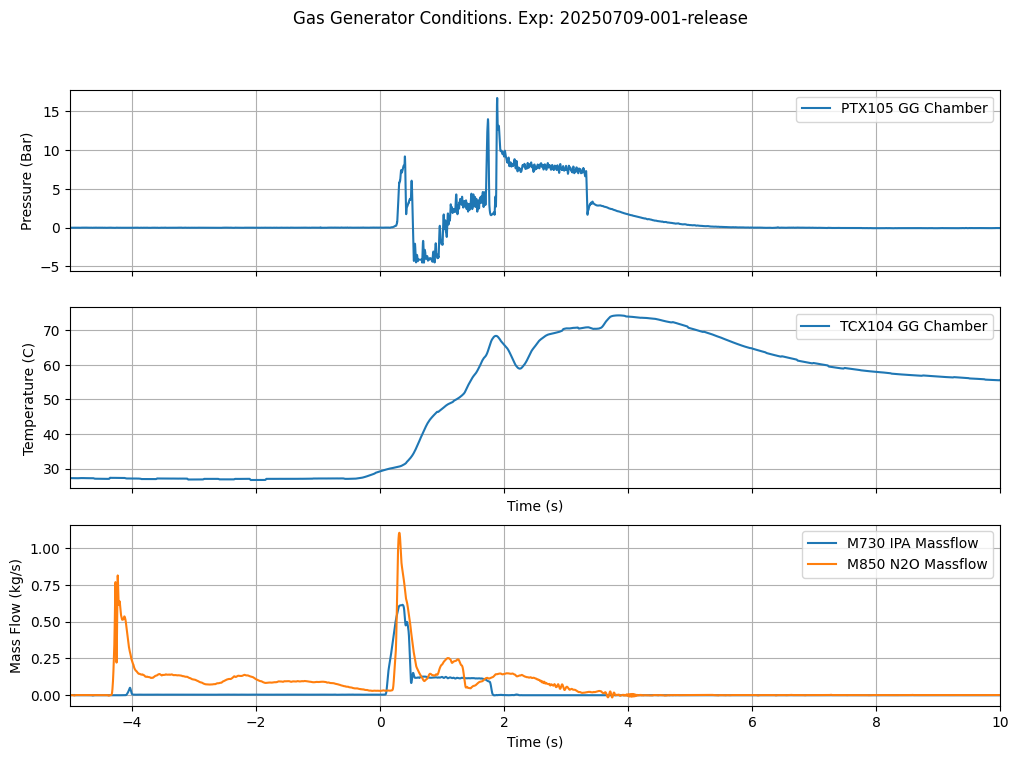

In [7]:
window = 301
polyorder = 3

fig, ax = plt.subplots(nrows = 3, sharex=True, figsize=(12,8))

PTX_105_FILT = savgol_filter(np.array(PTX105[ex_i]), window_length=window, polyorder=polyorder)
TCX_104_FILT = savgol_filter(
    np.array(TCX104[ex_i]), window_length=window, polyorder=polyorder
)

M730_FILT = savgol_filter(
    np.array(M730[ex_i]), window_length=window, polyorder=polyorder
)
M850_FILT = savgol_filter(
    np.array(M850[ex_i]), window_length=window, polyorder=polyorder
)

# Flow Rates
ax[0].plot(np.array(TIME[ex_i]), PTX_105_FILT, label = PTX105_NAME)
ax[0].legend()

ax[0].set_ylabel("Pressure (Bar)")

ax[0].grid(True)

# Thermocouple Measurement
ax[1].plot(np.array(TIME[ex_i]), TCX_104_FILT, label=TCX104_NAME)
ax[1].legend()

ax[1].set_ylabel("Temperature (C)")

ax[1].set_xlabel("Time (s)")
ax[1].set_xlim([-5,10])

ax[1].grid(True)

# Mass Flow Rates
ax[2].plot(np.array(TIME[ex_i]), M730_FILT, label=M730_NAME)
ax[2].plot(np.array(TIME[ex_i]), M850_FILT, label=M850_NAME)
ax[2].legend()

ax[2].set_ylabel("Mass Flow (kg/s)")

ax[2].set_xlabel("Time (s)")
ax[2].set_xlim([-5, 10])

ax[2].grid(True)


fig.suptitle(f"Gas Generator Conditions. Exp: {EXPERIMENT_NAME[ex_i]}")

We can also evaluate for the c* efficiency of the system by using our cantera solver. We will supply our gas chamber pressure and O/F we are combustion at, and get the c* of the gas.

We can then evaluate for the c* of the gas by doing the following:

$$c^* = \frac{p_c A_t}{\dot{m}}$$

In [8]:
ctr = CombustionCantera(
    fuel="C3H8O,2propanol",
    oxidiser="N2O",
    species_file="n2o_ipa.yaml",
)

i = 0

A_t = 4.45357383e-05

c_star_theo_arr = []
c_star_act_arr = []
time_arr = []

j = len(M730_FILT)
while i < j:

    # We get our O/F and chamber pressure
    o_f = (M850_FILT[i] - M850_FILT[0]) / M730_FILT[i]
    m_dot =  (M850_FILT[i] - M850_FILT[0]) + M730_FILT[i]
    p_c = (PTX_105_FILT[i] + 1)*1e5

    if p_c <= 0:
        p_c = 1e5

    gas = ctr.get_thermo_prop(Pcc = p_c, MR = o_f)

    c_star_theo_arr.append(gas.get_c_star())

    print(f"Done {i}/{j}")

    # We can now also get the real c*
    c_star_act_arr.append(p_c*A_t/m_dot)

    # We also log the time
    time_arr.append(TIME[ex_i][i])
    i += 100

Done 0/470321
Done 100/470321
Done 200/470321
Done 300/470321
Done 400/470321
Done 500/470321
Done 600/470321
Done 700/470321
Done 800/470321
Done 900/470321
Done 1000/470321
Done 1100/470321
Done 1200/470321
Done 1300/470321
Done 1400/470321
Done 1500/470321
Done 1600/470321
Done 1700/470321
Done 1800/470321
Done 1900/470321
Done 2000/470321
Done 2100/470321
Done 2200/470321
Done 2300/470321
Done 2400/470321
Done 2500/470321
Done 2600/470321
Done 2700/470321
Done 2800/470321
Done 2900/470321
Done 3000/470321
Done 3100/470321
Done 3200/470321
Done 3300/470321
Done 3400/470321
Done 3500/470321
Done 3600/470321
Done 3700/470321
Done 3800/470321
Done 3900/470321
Done 4000/470321
Done 4100/470321
Done 4200/470321
Done 4300/470321
Done 4400/470321
Done 4500/470321
Done 4600/470321
Done 4700/470321
Done 4800/470321
Done 4900/470321
Done 5000/470321
Done 5100/470321
Done 5200/470321
Done 5300/470321
Done 5400/470321
Done 5500/470321
Done 5600/470321
Done 5700/470321
Done 5800/470321
Done 5900

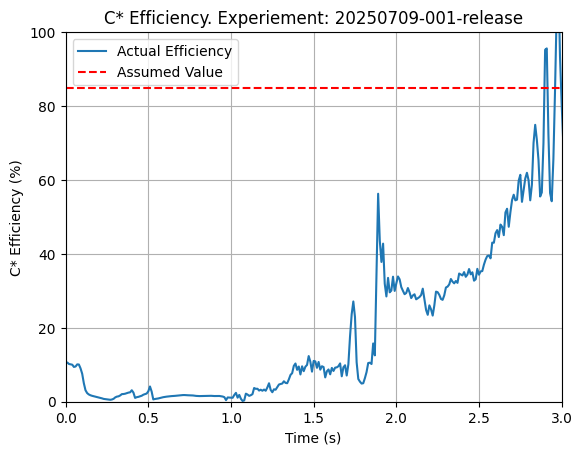

In [9]:
plt.plot(time_arr, (np.array(c_star_act_arr)/np.array(c_star_theo_arr))*100, label="Actual Efficiency")

plt.ylim([0, 100])

plt.xlim([0,3])

plt.title(f"C* Efficiency. Experiement: {EXPERIMENT_NAME[ex_i]}")
plt.xlabel("Time (s)")
plt.ylabel("C* Efficiency (%)")

plt.grid()

plt.axhline(85, color="r", linestyle="--", label="Assumed Value")

plt.legend()

###### 2.2.1.1.4 - Injector Parameters

Here we model for the gas generator injector conditions, based on the mass flow rate and pressure drop across the gas generator.

A slight offset is present on the nitrous line, so we have to shift the pressure readings for the calculation of the cda

In [10]:
D_inner = 1.2e-3
D_outer = 1.6e-3

D_anulus = 2e-3
N = 3

A_fu = np.pi * N * (D_inner / 2) ** 2

A_ox = (np.pi * N * (D_anulus / 2) ** 2) - (np.pi * N * (D_outer / 2) ** 2)



NameError: name 'PTX_852_FILT' is not defined

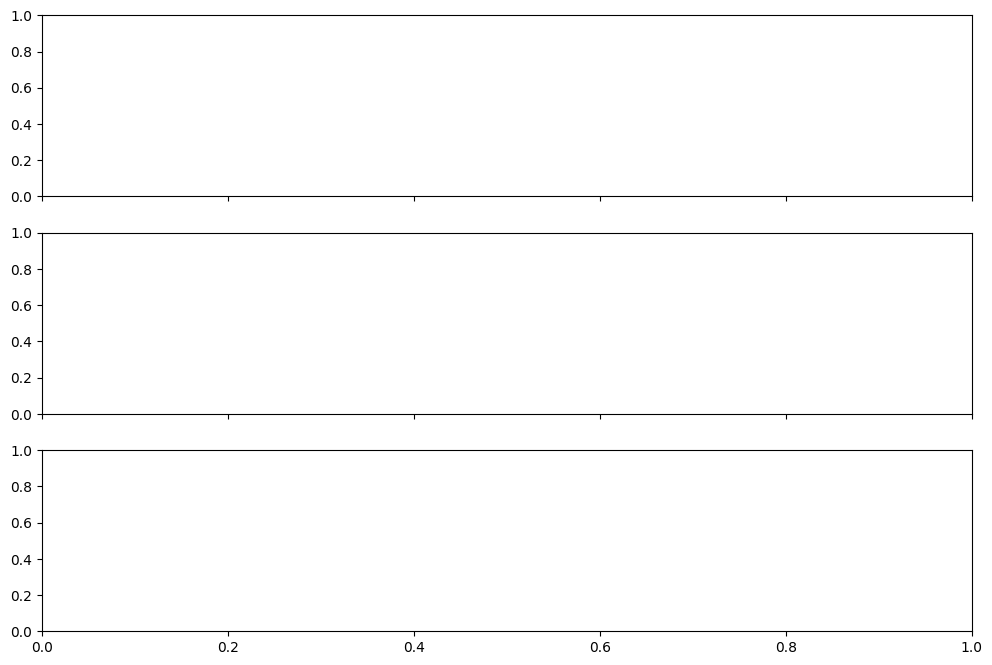

In [11]:
window = 301
polyorder = 3

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(12, 8))

PTX_852_FILT = savgol_filter(
    np.array(PTX852[ex_i]), window_length=window, polyorder=polyorder
) - PTX_852_FILT[0]


dp_fu = ( PTX_104_FILT - PTX_105_FILT ) * 1e5
dp_ox = ( PTX_852_FILT - PTX_105_FILT ) * 1e5

rho_fu = 786 # kg/m^3
rho_ox = 788 # kg/m^3

cda_fu = M730_FILT / (2 * rho_fu * dp_fu) ** (1 / 2)

cd_fu = cda_fu/A_fu
cda_ox = M850_FILT / (2 * rho_ox * dp_ox) ** (1 / 2)

cd_ox = cda_ox/A_ox

# Pressures of the System

ax[0].plot(np.array(TIME[ex_i]), PTX_104_FILT, label=PTX104_NAME)
ax[0].plot(np.array(TIME[ex_i]), PTX_852_FILT, label=PTX852_NAME)
ax[0].plot(np.array(TIME[ex_i]), PTX_105_FILT, label=PTX105_NAME)

ax[0].legend()

ax[0].set_ylabel("Pressure (Bar)")

ax[0].grid(True)


# Fuel Effective Orifice Area
ax[1].plot(np.array(TIME[ex_i]), cda_fu * 1e6, label = "Fuel CdA" )
ax[1].plot(np.array(TIME[ex_i]), cda_ox * 1e6, label = "Oxidiser CdA" )
ax[1].legend()

ax[1].set_ylabel("Fuel CdA (mm^2)")
ax[1].set_ylim([0,30])

ax[1].grid(True)

# Oxidiser Discharge Coefficient
ax[2].plot(np.array(TIME[ex_i]), cd_ox, label = "Ox Orifice")
ax[2].plot(np.array(TIME[ex_i]), cd_fu, label = "Fuel Orifice")
ax[2].legend()

ax[2].set_ylabel("Orifice Discharge Coefficients (N/A)")

ax[2].set_xlabel("Time (s)")
ax[2].set_xlim([0, 5])
ax[2].set_ylim([0,1])

ax[2].grid(True)

fig.suptitle(f"GG Injector Conditions. Exp: {EXPERIMENT_NAME[ex_i]}")

###### 2.2.1.1.5 - Spectrogram Analysis

This section we do the spectrogram analysis of the main video to see what the frequency intensity of the video

In [ ]:
FILE_NAME = "20250709-001_2160p60.wav"

fs, data = wavfile.read(os.path.join(DIRECTORY, FILE_NAME))  # Replace with your filename

# Step 2: If stereo, take one channel
if data.ndim > 1:
    data = data[:, 0]  # Take the left channel (or use data.mean(axis=1) for mono)


We can then plot the spectrogram

C:\Users\elias\AppData\Local\Temp\ipykernel_28020\1625491664.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx), )


(-12.0, 5000.0)

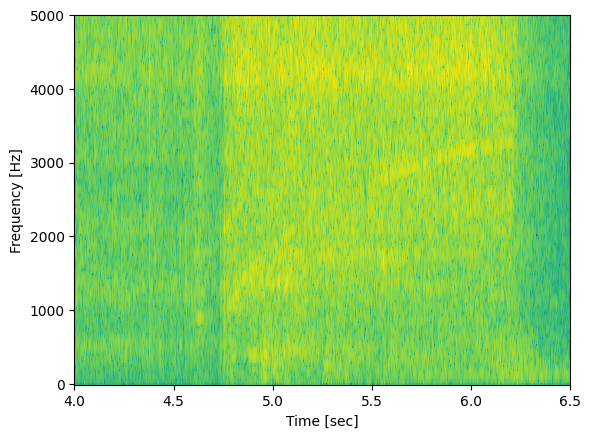

In [ ]:
f, t, Sxx = spectrogram(x = data, fs = fs, nfft=2000, nperseg=400, noverlap=300)
plt.pcolormesh(t, f, 10 * np.log10(Sxx), )
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
plt.xlim([4,6.5])
plt.ylim(top=5000)

###### 2.2.1.1.6 - Pixel Tracking

Here we take the CHRONOS

##### 2.2.1.2 - Experiment #2

This experiment was a simple 2 second spin of the GG to demonstrate functional performance of the system

In [36]:
ex_i = 1  # Experiment Number

###### 2.2.1.2.1 - Engine Conditions

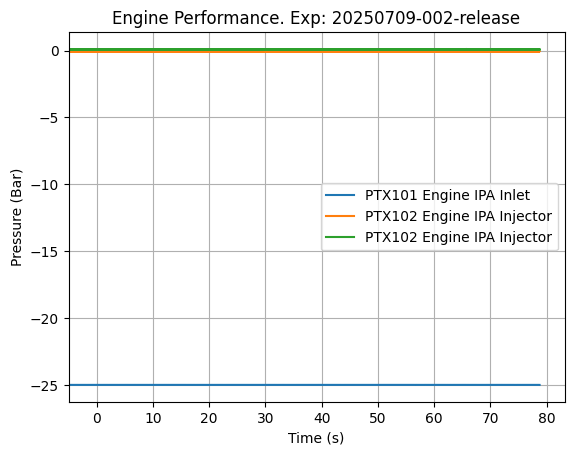

In [37]:
window = 301
polyorder = 3

PTX_101_FILT = savgol_filter(np.array(PTX101[ex_i]), window_length=window, polyorder=polyorder)
PTX_102_FILT = savgol_filter(np.array(PTX102[ex_i]), window_length=window, polyorder=polyorder)
PTX_103_FILT = savgol_filter(np.array(PTX103[ex_i]), window_length=window, polyorder=polyorder)

plt.plot(np.array(TIME[ex_i]), PTX_101_FILT, label = PTX101_NAME)
plt.plot(np.array(TIME[ex_i]), PTX_102_FILT, label=PTX102_NAME)
plt.plot(np.array(TIME[ex_i]), PTX_103_FILT, label=PTX102_NAME)

plt.legend()
plt.title(f"Engine Performance. Exp: {EXPERIMENT_NAME[ex_i]}")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (Bar)")

plt.xlim(left=-5)

plt.grid(True)

###### 2.2.1.2.2 - Pump Conditions

Text(0.5, 0.98, 'Pump Performance. Exp: 20250709-002-release')

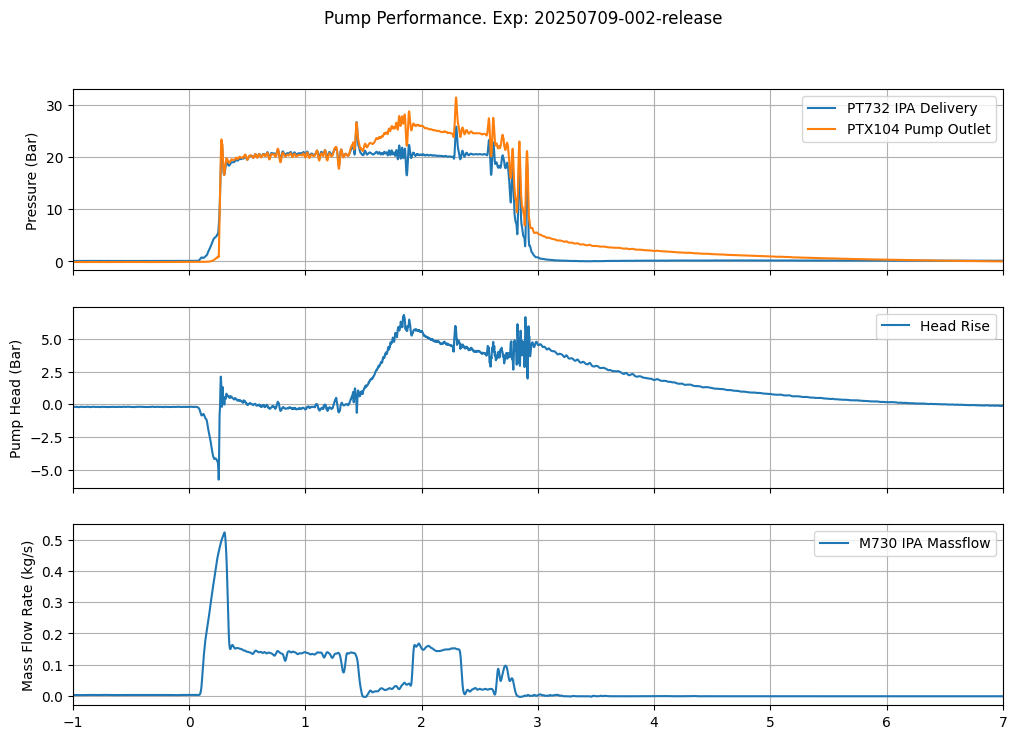

In [63]:
window = 301
polyorder = 3

PTX_732_FILT = savgol_filter(np.array(PTX732[ex_i]), window_length=window, polyorder=polyorder)
PTX_733_FILT = savgol_filter(np.array(PTX733[ex_i]), window_length=window, polyorder=polyorder)
M730_FILT = savgol_filter(
    np.array(M730[ex_i]), window_length=window, polyorder=polyorder
)
PTX_104_FILT = savgol_filter(
    np.array(PTX104[ex_i]), window_length=window, polyorder=polyorder
)

fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(12,8))

axs[0].plot(np.array(TIME[ex_i]), PTX_732_FILT, label = PTX732_NAME)
axs[0].plot(np.array(TIME[ex_i]), PTX_104_FILT, label=PTX104_NAME)
axs[0].legend()
axs[0].set_ylabel("Pressure (Bar)")
axs[0].grid(True)

axs[1].plot(np.array(TIME[ex_i]), PTX_104_FILT - PTX_732_FILT, label="Head Rise")
axs[1].legend()
axs[1].set_ylabel(f"Pump Head (Bar)")
axs[1].grid(True)

axs[2].plot(np.array(TIME[ex_i]), M730_FILT, label=M730_NAME)
axs[2].legend()
axs[2].set_ylabel(f"Mass Flow Rate (kg/s)")
axs[2].grid(True)

axs[2].set_xlim([-1, 7])

fig.suptitle(f"Pump Performance. Exp: {EXPERIMENT_NAME[ex_i]}")

###### 2.2.1.2.3 - GG Conditions

Text(0.5, 0.98, 'Gas Generator Conditions. Exp: 20250709-002-release')

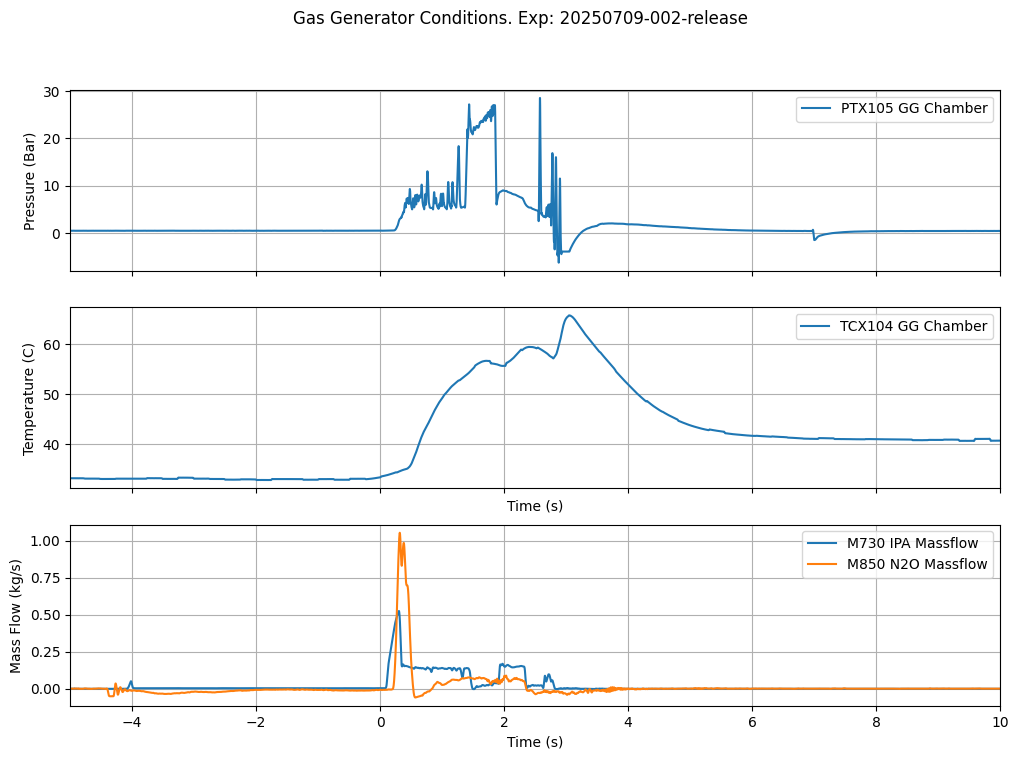

In [39]:
window = 301
polyorder = 3

fig, ax = plt.subplots(nrows = 3, sharex=True, figsize=(12,8))

PTX_105_FILT = savgol_filter(np.array(PTX105[ex_i]), window_length=window, polyorder=polyorder)
TCX_104_FILT = savgol_filter(
    np.array(TCX104[ex_i]), window_length=window, polyorder=polyorder
)

M730_FILT = savgol_filter(
    np.array(M730[ex_i]), window_length=window, polyorder=polyorder
)
M850_FILT = savgol_filter(
    np.array(M850[ex_i]), window_length=window, polyorder=polyorder
)

# Flow Rates
ax[0].plot(np.array(TIME[ex_i]), PTX_105_FILT, label = PTX105_NAME)
ax[0].legend()

ax[0].set_ylabel("Pressure (Bar)")

ax[0].grid(True)

# Thermocouple Measurement
ax[1].plot(np.array(TIME[ex_i]), TCX_104_FILT, label=TCX104_NAME)
ax[1].legend()

ax[1].set_ylabel("Temperature (C)")

ax[1].set_xlabel("Time (s)")
ax[1].set_xlim([-5,10])

ax[1].grid(True)

# Mass Flow Rates
ax[2].plot(np.array(TIME[ex_i]), M730_FILT, label=M730_NAME)
ax[2].plot(np.array(TIME[ex_i]), M850_FILT, label=M850_NAME)
ax[2].legend()

ax[2].set_ylabel("Mass Flow (kg/s)")

ax[2].set_xlabel("Time (s)")
ax[2].set_xlim([-5, 10])

ax[2].grid(True)


fig.suptitle(f"Gas Generator Conditions. Exp: {EXPERIMENT_NAME[ex_i]}")

We can also evaluate for the c* efficiency of the system by using our cantera solver. We will supply our gas chamber pressure and O/F we are combustion at, and get the c* of the gas.

We can then evaluate for the c* of the gas by doing the following:

$$c^* = \frac{p_c A_t}{\dot{m}}$$

In [40]:
ctr = CombustionCantera(
    fuel="C3H8O,2propanol",
    oxidiser="N2O",
    species_file="n2o_ipa.yaml",
)

i = 0

A_t = 4.45357383e-05

c_star_theo_arr = []
c_star_act_arr = []
time_arr = []

j = len(M730_FILT)
while i < j:

    # We get our O/F and chamber pressure
    o_f = (M850_FILT[i] - M850_FILT[0]) / M730_FILT[i]
    m_dot =  (M850_FILT[i] - M850_FILT[0]) + M730_FILT[i]
    p_c = (PTX_105_FILT[i] + 1)*1e5

    if p_c <= 0:
        p_c = 1e5

    gas = ctr.get_thermo_prop(Pcc = p_c, MR = o_f)

    c_star_theo_arr.append(gas.get_c_star())

    print(f"Done {i}/{j}")

    # We can now also get the real c*
    c_star_act_arr.append(p_c*A_t/m_dot)

    # We also log the time
    time_arr.append(TIME[ex_i][i])
    i += 100

Done 0/887327
Done 100/887327
Done 200/887327
Done 300/887327
Done 400/887327
Done 500/887327
Done 600/887327
Done 700/887327
Done 800/887327
Done 900/887327
Done 1000/887327
Done 1100/887327
Done 1200/887327
Done 1300/887327
Done 1400/887327
Done 1500/887327
Done 1600/887327
Done 1700/887327
Done 1800/887327
Done 1900/887327
Done 2000/887327
Done 2100/887327
Done 2200/887327
Done 2300/887327
Done 2400/887327
Done 2500/887327
Done 2600/887327
Done 2700/887327
Done 2800/887327
Done 2900/887327
Done 3000/887327
Done 3100/887327
Done 3200/887327
Done 3300/887327
Done 3400/887327
Done 3500/887327
Done 3600/887327
Done 3700/887327
Done 3800/887327
Done 3900/887327
Done 4000/887327
Done 4100/887327
Done 4200/887327
Done 4300/887327
Done 4400/887327
Done 4500/887327
Done 4600/887327
Done 4700/887327
Done 4800/887327
Done 4900/887327
Done 5000/887327
Done 5100/887327
Done 5200/887327
Done 5300/887327
Done 5400/887327
Done 5500/887327
Done 5600/887327
Done 5700/887327
Done 5800/887327
Done 5900

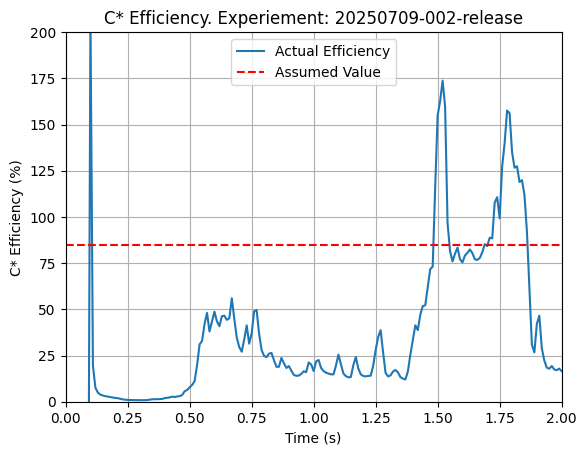

In [41]:
plt.plot(time_arr, (np.array(c_star_act_arr)/np.array(c_star_theo_arr))*100, label="Actual Efficiency")

plt.ylim([0, 200])

plt.xlim([0,2])

plt.title(f"C* Efficiency. Experiement: {EXPERIMENT_NAME[ex_i]}")
plt.xlabel("Time (s)")
plt.ylabel("C* Efficiency (%)")

plt.grid()

plt.axhline(85, color="r", linestyle="--", label="Assumed Value")

plt.legend()

###### 2.2.1.2.4 - Injector Parameters

Here we model for the gas generator injector conditions, based on the mass flow rate and pressure drop across the gas generator.

A slight offset is present on the nitrous line, so we have to shift the pressure readings for the calculation of the cda

In [42]:
D_inner = 1.2e-3
D_outer = 1.6e-3

D_anulus = 2e-3
N = 3

A_fu = np.pi * N * (D_inner / 2) ** 2

A_ox = (np.pi * N * (D_anulus / 2) ** 2) - (np.pi * N * (D_outer / 2) ** 2)


C:\Users\elias\AppData\Local\Temp\ipykernel_27568\3829623548.py:18: RuntimeWarning: invalid value encountered in sqrt
  cda_fu = M730_FILT / (2 * rho_fu * dp_fu) ** (1 / 2)
C:\Users\elias\AppData\Local\Temp\ipykernel_27568\3829623548.py:21: RuntimeWarning: invalid value encountered in sqrt
  cda_ox = M850_FILT / (2 * rho_ox * dp_ox) ** (1 / 2)


Text(0.5, 0.98, 'GG Injector Conditions. Exp: 20250709-002-release')

c:\Users\elias\Desktop\MermaidManBarnacleBoy\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\elias\Desktop\MermaidManBarnacleBoy\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


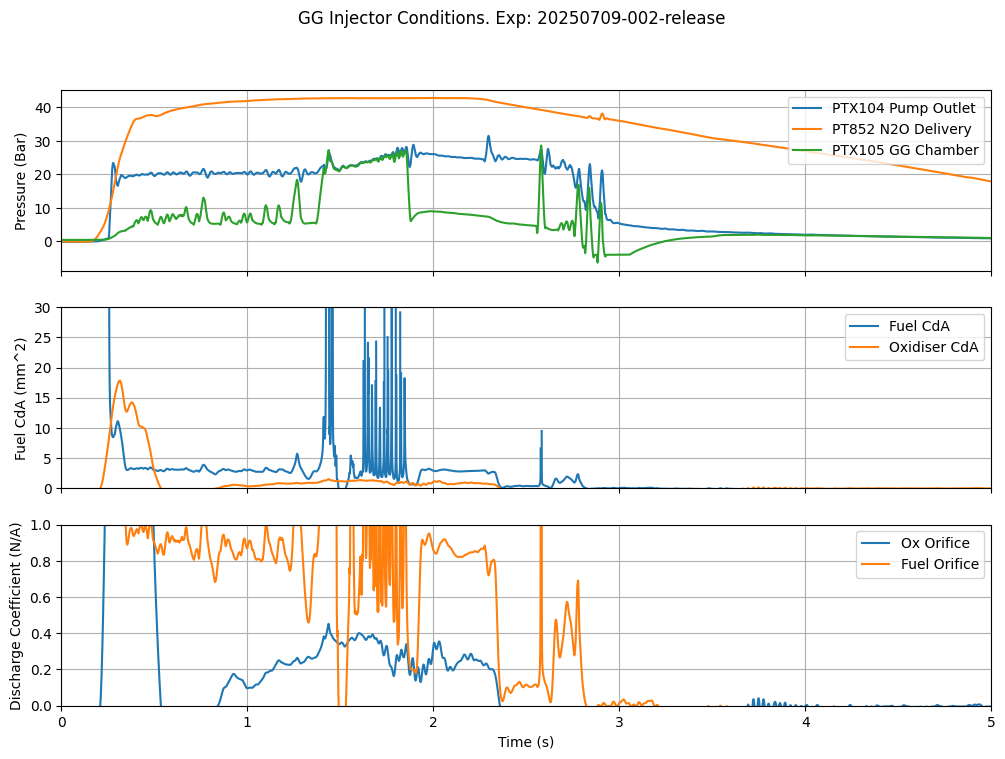

In [45]:
window = 301
polyorder = 3

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(12, 8))

PTX_852_FILT = (
    savgol_filter(np.array(PTX852[ex_i]), window_length=window, polyorder=polyorder)
    - PTX852[ex_i][0]
)


dp_fu = ( PTX_104_FILT - PTX_105_FILT ) * 1e5
dp_ox = ( PTX_852_FILT - PTX_105_FILT ) * 1e5

rho_fu = 786 # kg/m^3
rho_ox = 788 # kg/m^3

cda_fu = M730_FILT / (2 * rho_fu * dp_fu) ** (1 / 2)

cd_fu = cda_fu/A_fu
cda_ox = M850_FILT / (2 * rho_ox * dp_ox) ** (1 / 2)

cd_ox = cda_ox/A_ox

# Pressures of the System

ax[0].plot(np.array(TIME[ex_i]), PTX_104_FILT, label=PTX104_NAME)
ax[0].plot(np.array(TIME[ex_i]), PTX_852_FILT, label=PTX852_NAME)
ax[0].plot(np.array(TIME[ex_i]), PTX_105_FILT, label=PTX105_NAME)

ax[0].legend()

ax[0].set_ylabel("Pressure (Bar)")

ax[0].grid(True)


# Fuel Effective Orifice Area
ax[1].plot(np.array(TIME[ex_i]), cda_fu * 1e6, label = "Fuel CdA" )
ax[1].plot(np.array(TIME[ex_i]), cda_ox * 1e6, label = "Oxidiser CdA" )
ax[1].legend()

ax[1].set_ylabel("Fuel CdA (mm^2)")
ax[1].set_ylim([0,30])

ax[1].grid(True)

# Oxidiser Discharge Coefficient
ax[2].plot(np.array(TIME[ex_i]), cd_ox, label = "Ox Orifice")
ax[2].plot(np.array(TIME[ex_i]), cd_fu, label = "Fuel Orifice")
ax[2].legend()

ax[2].set_ylabel("Discharge Coefficient (N/A)")

ax[2].set_xlabel("Time (s)")
ax[2].set_xlim([0, 5])
ax[2].set_ylim([0,1])

ax[2].grid(True)

fig.suptitle(f"GG Injector Conditions. Exp: {EXPERIMENT_NAME[ex_i]}")

###### 2.2.1.2.5 - Spectrogram Analysis

This section we do the spectrogram analysis of the main video to see what the frequency intensity of the video

In [18]:
FILE_NAME = "20250709-002_2160p60.wav"

fs, data = wavfile.read(os.path.join(DIRECTORY, FILE_NAME))  # Replace with your filename

# Step 2: If stereo, take one channel
if data.ndim > 1:
    data = data[:, 0]  # Take the left channel (or use data.mean(axis=1) for mono)


We can then plot the spectrogram

Text(0.5, 1.0, 'Audio Spectrogram. Exp: 20250709-002-release')

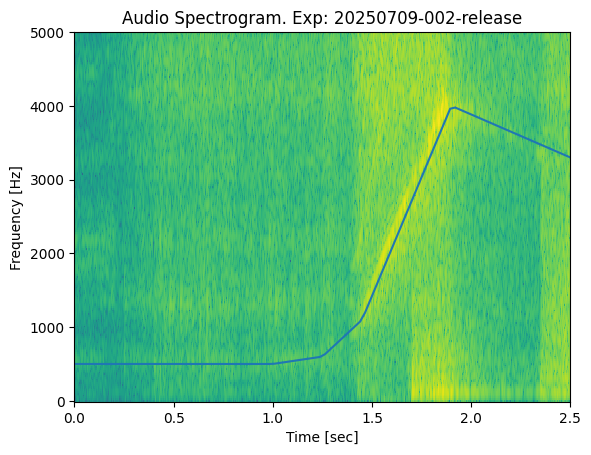

In [90]:
f, t, Sxx = spectrogram(x = data, fs = fs, nfft=2000, nperseg=400, noverlap=300)

n_zero = 161
fps = 60

t_zero = 161 * 1/60

plt.pcolormesh(t - t_zero, f, 10 * np.log10(Sxx), )
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
plt.xlim([0, 2.5])
plt.ylim(top=5000)

t_speed = [0, 1, 1.25, 1.45, 1.9, 2.5]
f_speed = [500, 500, 600, 1100, 4000, 3300]

# We can now do a polyfit
func = interpolate.interp1d(t_speed, f_speed)

t_array = np.linspace(0, 2.5, 100)
plt.plot(t_array, func(t_array))

plt.title(f"Audio Spectrogram. Exp: {EXPERIMENT_NAME[ex_i]}")

###### 2.2.1.2.6 - Pump Performance

As we now know the shaft speed of the pump, we can directly compute the head factor of the pump to evaluate for the efficiency during the spin up.

We will do this by evaluating for the theoretical pressure head at a closed condition using barskes relationship, and compare accordingly to the head we generated.

In [91]:
pump_dic = {
    "dp": 25e5,
    "m_dot": 1.2,
    "N": 24e3 * (2*np.pi)/60
}

A definition of the IPA fluid has been presented below:

In [92]:
IPA = IncompressibleFluid(rho=787, P=20e5, mue=2.37e-3)

The following geometric parameters and performance assumptions have been used:

In [93]:
pump_geo = {
    "fluid": IPA,
    "l_1": 10e-3,
    "l_2": 5e-3,
    "v_0": 3,
    "v_3f": 0.61,
    "d_1f": 1.2,
    "a_3f": 3.5,
    "delta_div": 8,
    "diffuser_type": DiffuserType.rectangular,
    "psi": 0.2,
}

pump = Barske(**pump_dic)

pump.size_pump(**pump_geo)

,Eye Diameter - d_0 (mm),Inlet Diameter - d_1 (mm),Exit Diameter - d_2 (mm),Entrance Axial Blade Length - l_1 (mm),Exit Axial Blade Legnth - l_2 (mm),Axial Clearance - c_1 (mm),Radial Clearance - c_2 (mm),Diffuser Type,Diffuser Throat - d_3 (mm),Diffuser Exit - d_4 (mm),Diffuser Length - L (mm),Inlet Eye Velocity - v_o (m/s),Impeller Inlet Velocity - v_1 (m/s),Relative Exit Velocity - w_2 (m/s)
0,25.438863,30.526635,64.259317,10.0,5.0,0.642593,3.212966,DiffuserType.rectangular,6.190999,21.668495,110.12811,3,1.589929,1.510604


We can now make the plot by inspecting the head during the timeperiod specified and the shaft speed specified.

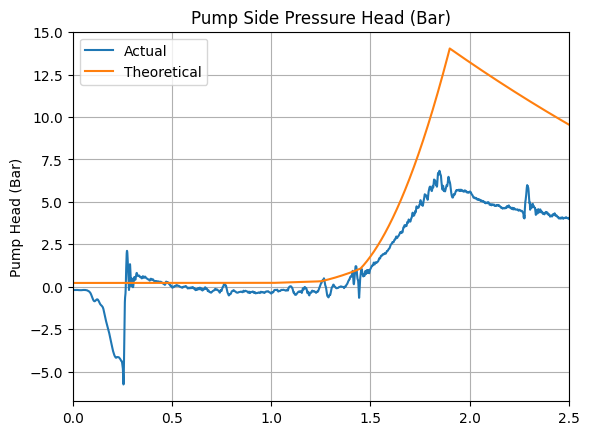

In [113]:
theo_head = []

cond = (np.array(TIME[ex_i]) <= 2.5) & (np.array(TIME[ex_i]) >= 0)

result = np.where(cond)


for f in np.array(TIME[ex_i])[result]:

    f = func(f)
    N = f*60/18 * np.pi/30

    theo_head.append(pump.get_head(psi=1, N=N))

tim = TIME[ex_i]

fig, ax = plt.subplots()

ax.plot(np.array(TIME[ex_i])[result], (PTX_104_FILT - PTX_732_FILT)[result], label="Actual")
ax.plot(np.array(TIME[ex_i])[result], np.array(theo_head) * 786 * 9.81 / 1e5, label="Theoretical")
ax.legend()
ax.set_xlim([0,2.5])
ax.set_ylabel(f"Pump Head (Bar)")
ax.set_title(f"Pump Side Pressure Head (Bar)")
ax.grid(True)

C:\Users\elias\AppData\Local\Temp\ipykernel_27568\942443649.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


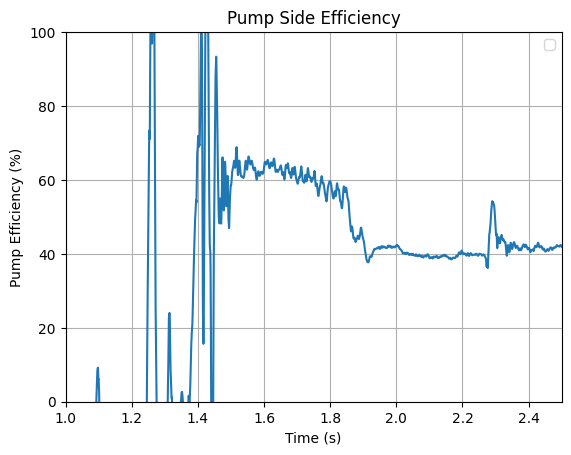

In [114]:
fig, ax = plt.subplots()

actual = (PTX_104_FILT - PTX_732_FILT)[result]
eta = actual / (np.array(theo_head) * 786 * 9.81 / 1e5)

ax.plot(
    np.array(TIME[ex_i])[result], eta * 100)

ax.legend()
ax.set_xlim([1, 2.5])
ax.set_ylim([0,100])
ax.set_ylabel(f"Pump Efficiency (%)")
ax.set_xlabel(f"Time (s)")
ax.set_title("Pump Side Efficiency")
ax.grid(True)